# Importing Libraries and Dataset

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)  #To ignore every "futurewarning"

In [6]:
df1=pd.read_csv(r"C:\Users\Shashwat\OneDrive\Desktop\Project\Delhi_AQI (2021-2024 ) dataset.csv")

# Description

In [7]:
df1.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [8]:
df1.describe()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,15.729637,6.522930,2022.501027,0.189596,4.000684,90.774538,218.219261,37.184921,20.104921,1.025832,36.338871,202.210815
std,8.803105,3.449884,1.118723,0.392116,2.001883,71.650579,129.297734,35.225327,16.543659,0.608305,18.951204,107.801076
min,1.000000,1.000000,2021.000000,0.000000,1.000000,0.050000,9.690000,2.160000,1.210000,0.270000,2.700000,19.000000
25%,8.000000,4.000000,2022.000000,0.000000,2.000000,41.280000,115.110000,17.280000,7.710000,0.610000,24.100000,108.000000
50%,16.000000,7.000000,2023.000000,0.000000,4.000000,72.060000,199.800000,30.490000,15.430000,0.850000,32.470000,189.000000
75%,23.000000,10.000000,2024.000000,0.000000,6.000000,118.500000,297.750000,45.010000,26.620000,1.240000,45.730000,284.000000
max,31.000000,12.000000,2024.000000,1.000000,7.000000,1000.000000,1000.000000,433.980000,113.400000,4.700000,115.870000,500.000000


# Data Wrangling

In [9]:
# 1. Show missing value summary per column:
print("Missing values per column:\n")
print(df1.isnull().sum())
print("\n")

# 2. Check DataTypes : 
print("Data types of each column:\n")
print(df1.dtypes)
print ("\n")


Missing values per column:

Date              0
Month             0
Year              0
Holidays_Count    0
Days              0
PM2.5             0
PM10              0
NO2               0
SO2               0
CO                0
Ozone             0
AQI               0
dtype: int64


Data types of each column:

Date                int64
Month               int64
Year                int64
Holidays_Count      int64
Days                int64
PM2.5             float64
PM10              float64
NO2               float64
SO2               float64
CO                float64
Ozone             float64
AQI                 int64
dtype: object




In [10]:
def data_details(data):
    nulls = df1.isnull().sum().sum() #gives total number of Nulls rows
    duplicates = df1.duplicated().sum() #gives total number of duplicates in the data
    total_numerical = len(df1.select_dtypes(include='number').columns)
    output = f'Total Nulls = {nulls}\nTotal Duplicates = {duplicates} \nTotal Number of Numerical Columns = {total_numerical}'
    return print(output)
data_details(df1)

Total Nulls = 0
Total Duplicates = 0 
Total Number of Numerical Columns = 12


In [11]:
#date columns engineering
def date_eng(df):
    
    df.rename(columns={"Date":"Day"}, inplace=True) #renames the Date column to Day
    df["Date"] = pd.to_datetime(df[["Year", "Month", "Day"]]) #creates a new datetime column from the Year, Month, Day
    df.drop(["Month", "Day", "Days", "Year"], axis=1, inplace=True)
    df["Day"] = df["Date"].dt.day_name() #extracts actual day name from the datetime column
    df["Month"] =df["Date"].dt.month_name() #extracts actual month names from the datetime column
    df["Year"] = df["Date"].dt.year #extract the actual Year

    return df
df2=date_eng(df1)
df2

,Holidays_Count,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,Date,Day,Month,Year
0,0,408.80,442.42,160.61,12.95,2.77,43.19,462,2021-01-01,Friday,January,2021
1,0,404.04,561.95,52.85,5.18,2.60,16.43,482,2021-01-02,Saturday,January,2021
2,1,225.07,239.04,170.95,10.93,1.40,44.29,263,2021-01-03,Sunday,January,2021
3,0,89.55,132.08,153.98,10.42,1.01,49.19,207,2021-01-04,Monday,January,2021
4,0,54.06,55.54,122.66,9.70,0.64,48.88,149,2021-01-05,Tuesday,January,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0,58.43,249.17,41.69,65.89,0.99,36.25,263,2024-12-27,Friday,December,2024
1457,0,33.83,150.77,33.31,66.14,0.79,35.19,113,2024-12-28,Saturday,December,2024
1458,1,31.21,139.75,27.01,65.94,0.57,35.88,142,2024-12-29,Sunday,December,2024
1459,0,38.01,152.83,29.12,65.16,0.55,38.38,116,2024-12-30,Monday,December,2024


In [12]:
#Replacing Holiday boolean represention with actual string, to make visualization more understandable
df2["Holiday"] = df2["Holidays_Count"].map({1: "Holiday", 0: "No Holiday"})
df2.drop(["Holidays_Count"], axis=1, inplace = True)


In [13]:
df2

,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,Date,Day,Month,Year,Holiday
0,408.80,442.42,160.61,12.95,2.77,43.19,462,2021-01-01,Friday,January,2021,No Holiday
1,404.04,561.95,52.85,5.18,2.60,16.43,482,2021-01-02,Saturday,January,2021,No Holiday
2,225.07,239.04,170.95,10.93,1.40,44.29,263,2021-01-03,Sunday,January,2021,Holiday
3,89.55,132.08,153.98,10.42,1.01,49.19,207,2021-01-04,Monday,January,2021,No Holiday
4,54.06,55.54,122.66,9.70,0.64,48.88,149,2021-01-05,Tuesday,January,2021,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,58.43,249.17,41.69,65.89,0.99,36.25,263,2024-12-27,Friday,December,2024,No Holiday
1457,33.83,150.77,33.31,66.14,0.79,35.19,113,2024-12-28,Saturday,December,2024,No Holiday
1458,31.21,139.75,27.01,65.94,0.57,35.88,142,2024-12-29,Sunday,December,2024,Holiday
1459,38.01,152.83,29.12,65.16,0.55,38.38,116,2024-12-30,Monday,December,2024,No Holiday


# Outliers Check

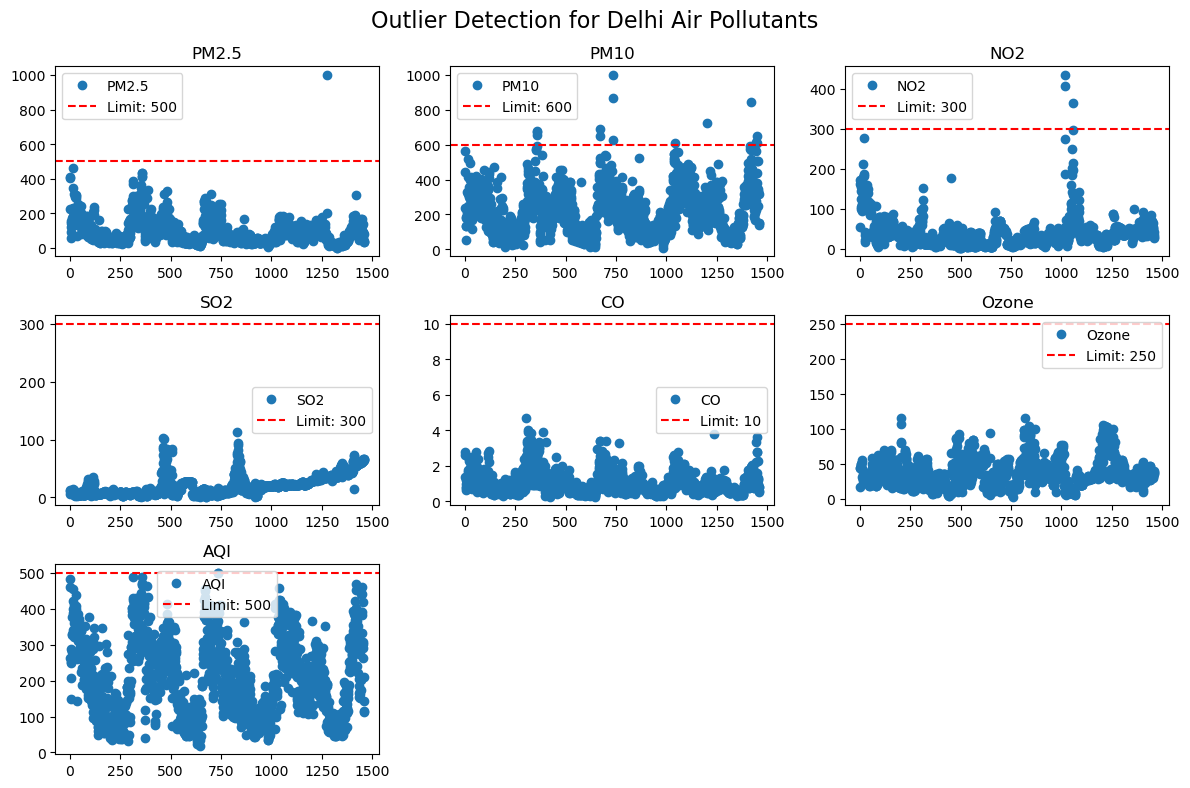

In [14]:
#test for outliers using a preset rule
#you could change the preset values to any value of your choice


filters = {"PM2.5": 500, "PM10": 600, "NO2": 300, "SO2": 300, "CO": 10, "Ozone": 250, "AQI": 500} 

"""Outlier analysis was performed using established reference thresholds based on standards from the Central
Pollution Control Board (CPCB), World Health Organization (WHO), and findings from previous Delhi air
quality studies. 
"""
numeric_cols = df2.select_dtypes(include='number').columns
num_cols = numeric_cols.drop('Year')

#lets visualize all columns

plt.figure(figsize=(12, 8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)  # Adjust grid to match the number of columns
    plt.plot(df2[col].values, marker='o', linestyle='', label=col)
    
    # Draw threshold if available in filters
    if col in filters:
        plt.axhline(y=filters[col], color='red', linestyle='--', label=f'Limit: {filters[col]}')

    plt.title(col)
    plt.legend()
    plt.suptitle("Outlier Detection for Delhi Air Pollutants", fontsize=16)
    plt.tight_layout()

plt.show()

In [15]:
#Let's create a function that would give a count of the outliers for guilty columns

def outlier(filters, df2):
    for col, val in filters.items():
        count = ((df2[col] > val) | (df2[col] < 0)).sum()
        if count > 0:
            print(f"{col} = {count} rows exceeded")
        else:
            print(f"There is no outlier in {col} column")
            
outlier(filters, df2)

PM2.5 = 1 rows exceeded
PM10 = 14 rows exceeded
NO2 = 3 rows exceeded
There is no outlier in SO2 column
There is no outlier in CO column
There is no outlier in Ozone column
There is no outlier in AQI column


In [16]:
#treating outliers by replacing them with the median value of their repective month
for col, val in filters.items():
    # Compute the monthly median for that column
    monthly_median = df2.groupby("Month")[col].transform("median")

    # Create a mask for outliers
    mask = (df2[col] > val) | (df2[col] < 0)

    # Replace outliers with the median of that month
    df2.loc[mask, col] = monthly_median[mask]

print("All Outliers Corrected")

All Outliers Corrected


In [17]:
#Let's check again

outlier(filters, df2)

There is no outlier in PM2.5 column
There is no outlier in PM10 column
There is no outlier in NO2 column
There is no outlier in SO2 column
There is no outlier in CO column
There is no outlier in Ozone column
There is no outlier in AQI column


# EDA & Visualization

In [18]:
#Let's engineer a column named "Quarter" so we can be able to properly have a time series analysis that consider seasons
df2["Quarter"] = df2["Month"].map({
    "January": "Q1", "February": "Q1", "March": "Q1",
    "April": "Q2", "May": "Q2", "June": "Q2",
    "July": "Q3", "August": "Q3", "September": "Q3",
    "October": "Q4", "November": "Q4", "December": "Q4"
})
df2.head()

,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,Date,Day,Month,Year,Holiday,Quarter
0,408.80,442.42,160.61,12.95,2.77,43.19,462,2021-01-01,Friday,January,2021,No Holiday,Q1
1,404.04,561.95,52.85,5.18,2.60,16.43,482,2021-01-02,Saturday,January,2021,No Holiday,Q1
2,225.07,239.04,170.95,10.93,1.40,44.29,263,2021-01-03,Sunday,January,2021,Holiday,Q1
3,89.55,132.08,153.98,10.42,1.01,49.19,207,2021-01-04,Monday,January,2021,No Holiday,Q1
4,54.06,55.54,122.66,9.70,0.64,48.88,149,2021-01-05,Tuesday,January,2021,No Holiday,Q1


In [19]:
df=df2

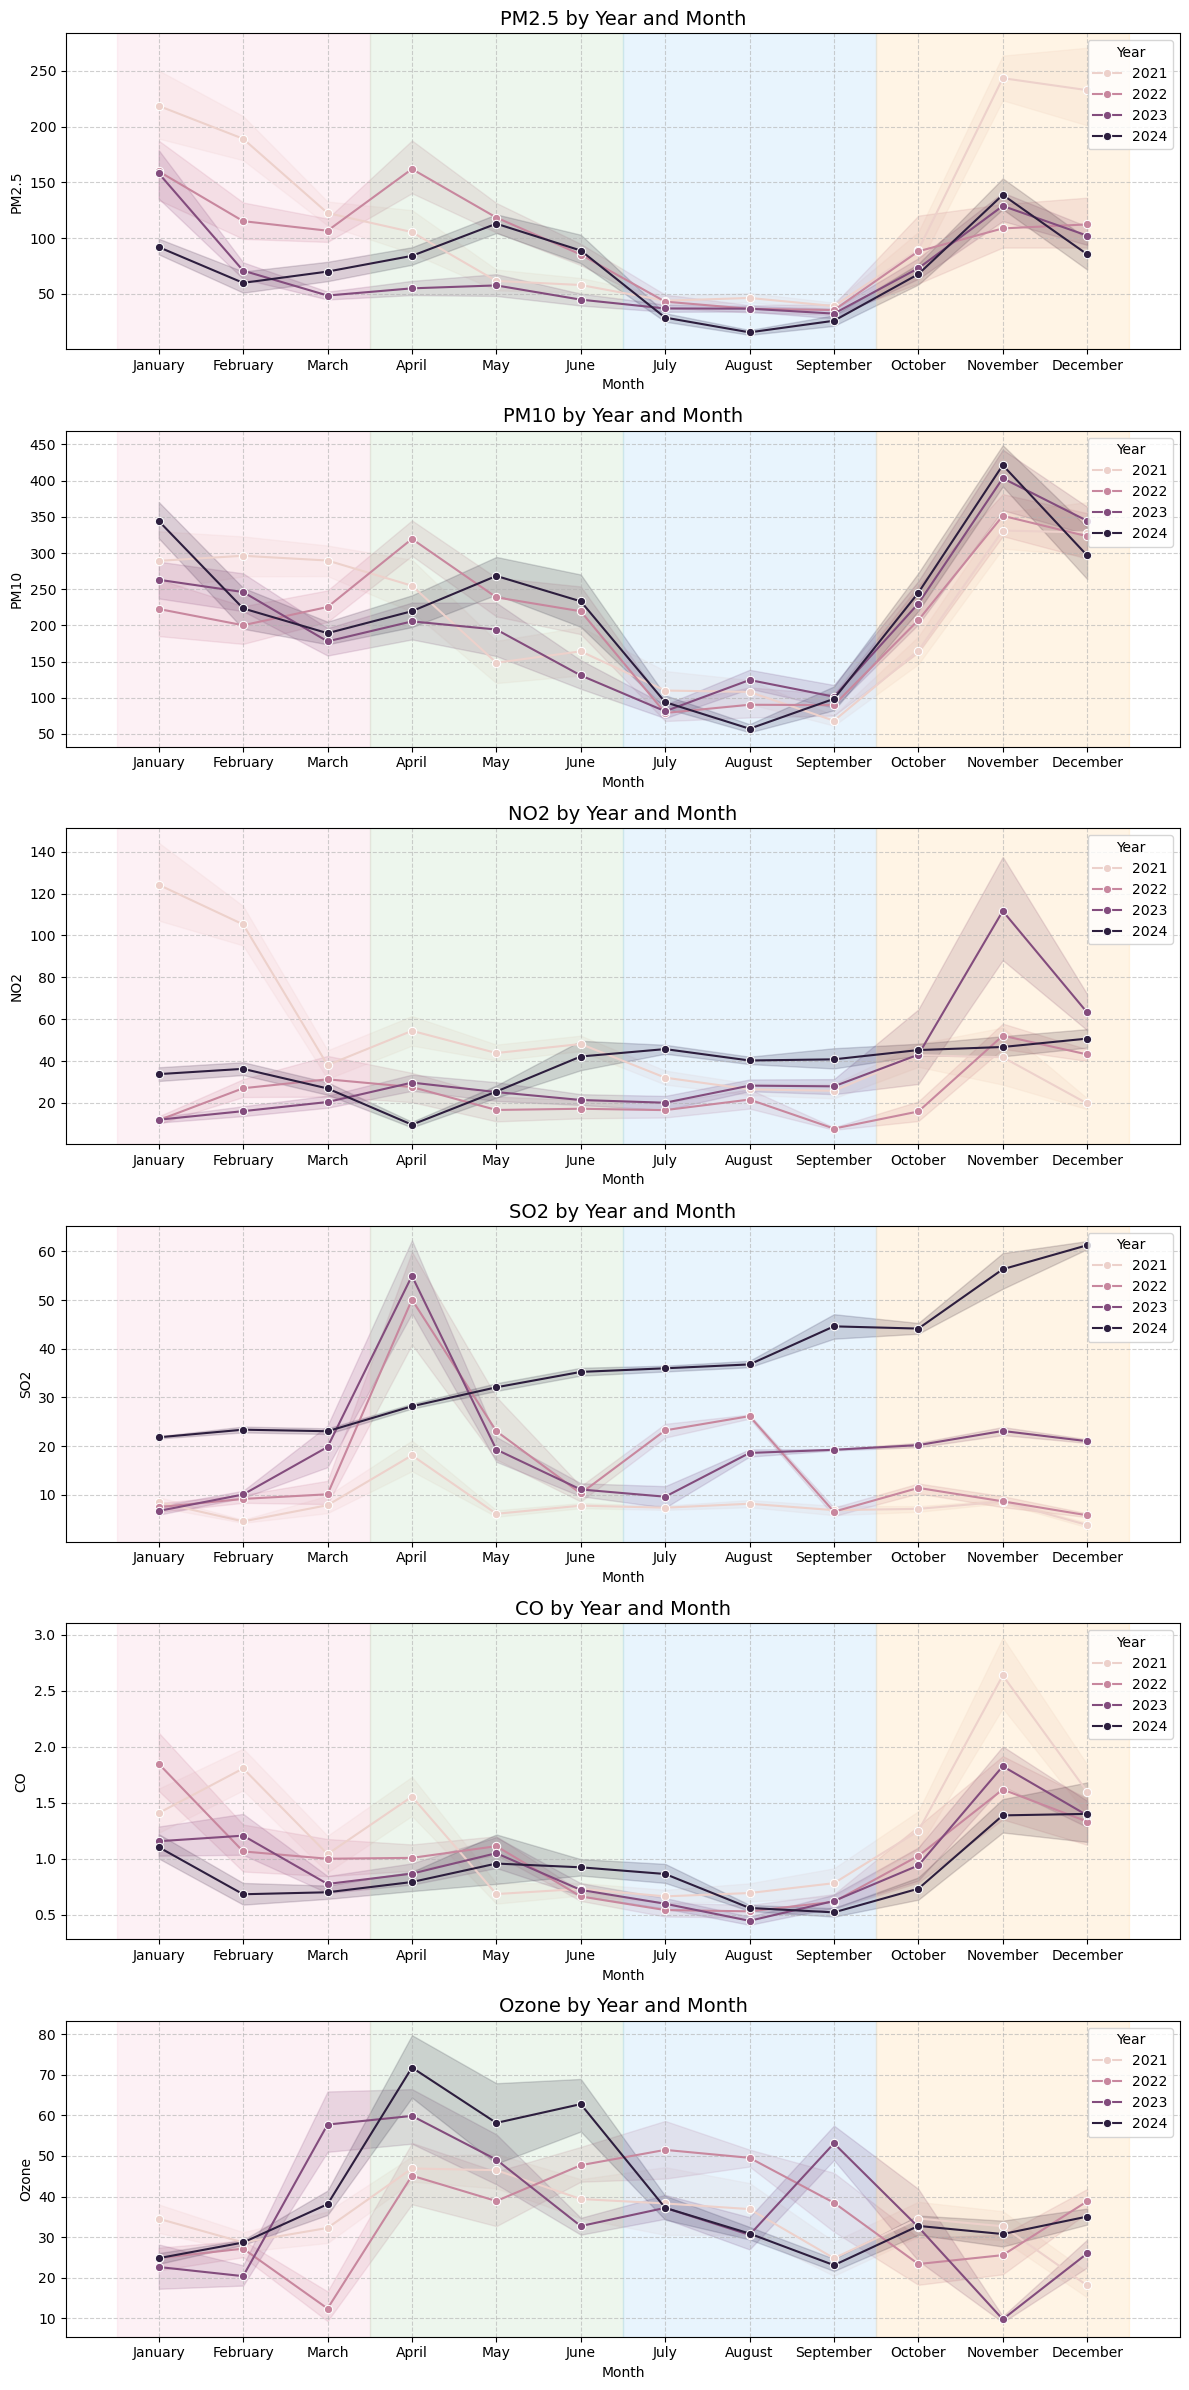

📊Seasonal/Quarterly Insights:

- PM2.5: highest in Q4, lowest in Q3 (seasonal/quarterly trend)
- PM10: highest in Q4, lowest in Q3 (seasonal/quarterly trend)
- NO2: highest in Q4, lowest in Q3 (seasonal/quarterly trend)
- SO2: highest in Q2, lowest in Q1 (seasonal/quarterly trend)
- CO: highest in Q4, lowest in Q3 (seasonal/quarterly trend)
- Ozone: highest in Q2, lowest in Q4 (seasonal/quarterly trend)


In [20]:
#pollutants list
pollutants = ["PM2.5", "PM10", "NO2", "SO2", "CO", "Ozone"]

# Number of subplots
n = len(pollutants)
fig, axes = plt.subplots(n, 1, figsize=(12, 4 * n), sharex=False)

# Define quarter colors
quarter_colors = {
    "Q1": "#F8BBD0",  # light pink
    "Q2": "#A5D6A7",  # soft green
    "Q3": "#90CAF9",  # light blue
    "Q4": "#FFCC80"   # warm orange
}

# Prepare seasonal/quarterly insights
insights = []

for i, pollutant in enumerate(pollutants):
    ax = axes[i]
    
    # Plot line by month and hue=Year
    sns.lineplot(
        data=df,
        x="Month",
        y=pollutant,
        hue="Year",
        marker="o",
        ax=ax
    )

    # Shade background by quarter
    months_order = df["Month"].unique()
    for q in df["Quarter"].unique():
        q_months = df[df["Quarter"] == q]["Month"].unique()
        if len(q_months) > 0:
            x_start = np.where(months_order == q_months[0])[0][0] - 0.5
            x_end = np.where(months_order == q_months[-1])[0][0] + 0.5
            ax.axvspan(x_start, x_end, color=quarter_colors[q], alpha=0.2)
    
    # Titles, grid, legend
    ax.set_title(f"{pollutant} by Year and Month", fontsize=14)
    ax.set_ylabel(pollutant)
    ax.set_xlabel("Month")
    ax.grid(True, linestyle="--", alpha=0.6)
    ax.legend(title="Year", loc="upper right")
    
    # --- Compute quarterly trend ---
    quarterly_avg = df.groupby("Quarter")[pollutant].mean()
    max_q = quarterly_avg.idxmax()
    min_q = quarterly_avg.idxmin()
    trend = f"{pollutant}: highest in {max_q}, lowest in {min_q} (seasonal/quarterly trend)"
    insights.append(trend)

plt.tight_layout()
plt.show()

# Print automated seasonal/quarterly insights
print("📊Seasonal/Quarterly Insights:\n")
for insight in insights:
    print("- " + insight)

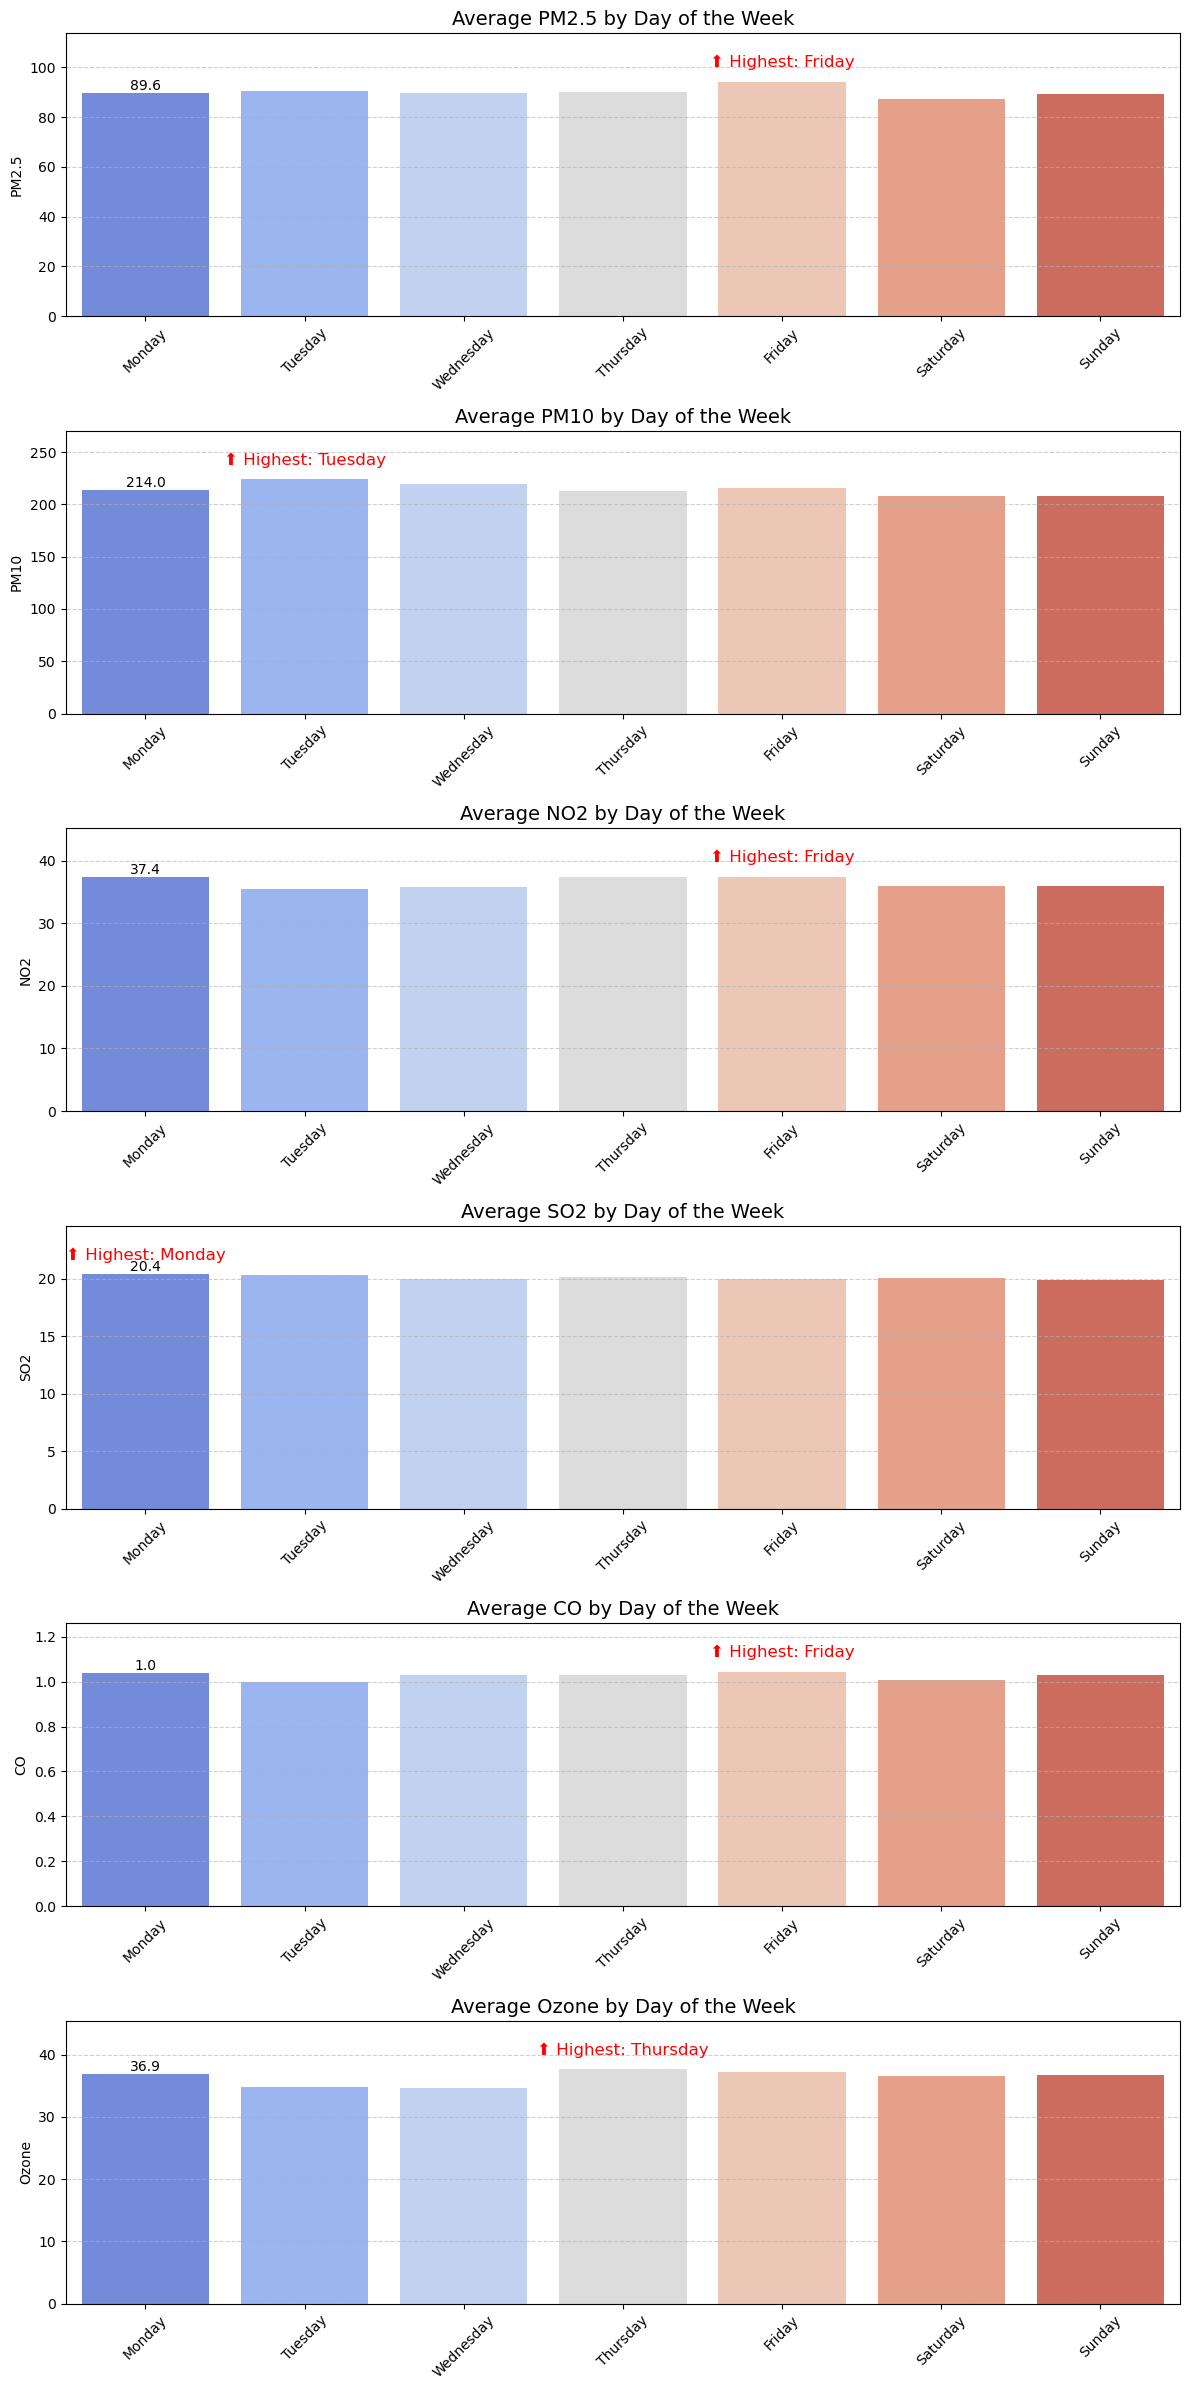

Insights by Day:

PM2.5 peaks on Fridays with an average of 94.2.
PM10 peaks on Tuesdays with an average of 223.8.
NO2 peaks on Fridays with an average of 37.4.
SO2 peaks on Mondays with an average of 20.4.
CO peaks on Fridays with an average of 1.0.
Ozone peaks on Thursdays with an average of 37.6.


In [21]:
# List of pollutant columns
pollutants = ["PM2.5", "PM10", "NO2", "SO2", "CO", "Ozone"]  # adjust based on your df

# Group by day_name and compute average (or median if you prefer)
daily_avg = df.groupby("Day")[pollutants].mean().reset_index()

# Ensure days are ordered properly
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_avg["Day"] = pd.Categorical(daily_avg["Day"], categories=day_order, ordered=True)
daily_avg = daily_avg.sort_values("Day")

# Create subplots
n = len(pollutants)
fig, axes = plt.subplots(n, 1, figsize=(12, 4 * n))

# Prepare automated insight text
insights = []

# Plot each pollutant as a bar chart
for i, pollutant in enumerate(pollutants):
    sns.barplot(
        data=daily_avg,
        x="Day",
        y=pollutant,
        palette="coolwarm",
        ax=axes[i]
    )
    axes[i].set_title(f"Average {pollutant} by Day of the Week", fontsize=14)
    axes[i].set_xlabel("")
    axes[i].set_ylabel(pollutant)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)
    axes[i].tick_params(axis='x', rotation=45)

    # Get limits and add some space at the top
    y_min, y_max = axes[i].get_ylim()
    axes[i].set_ylim(y_min, y_max * 1.15)

    # Highlight highest bar
    max_val = daily_avg[pollutant].max()
    max_day = daily_avg.loc[daily_avg[pollutant].idxmax(), "Day"]
    axes[i].bar_label(axes[i].containers[0], fmt="%.1f", label_type='edge')
    axes[i].text(
        daily_avg["Day"].tolist().index(max_day),
        max_val * 1.05,
        f"⬆ Highest: {max_day}",
        ha='center', va='bottom', color='red', fontsize=12
    )


  # Append automated insight for this pollutant
    insights.append(f"{pollutant} peaks on {max_day}s with an average of {max_val:.1f}.")

plt.tight_layout()
plt.show()

# Print automated insights
print("Insights by Day:\n")
for insight in insights:
    print(insight)

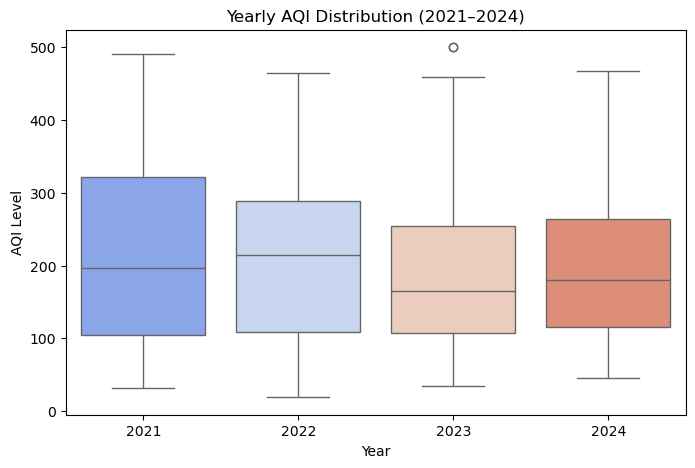

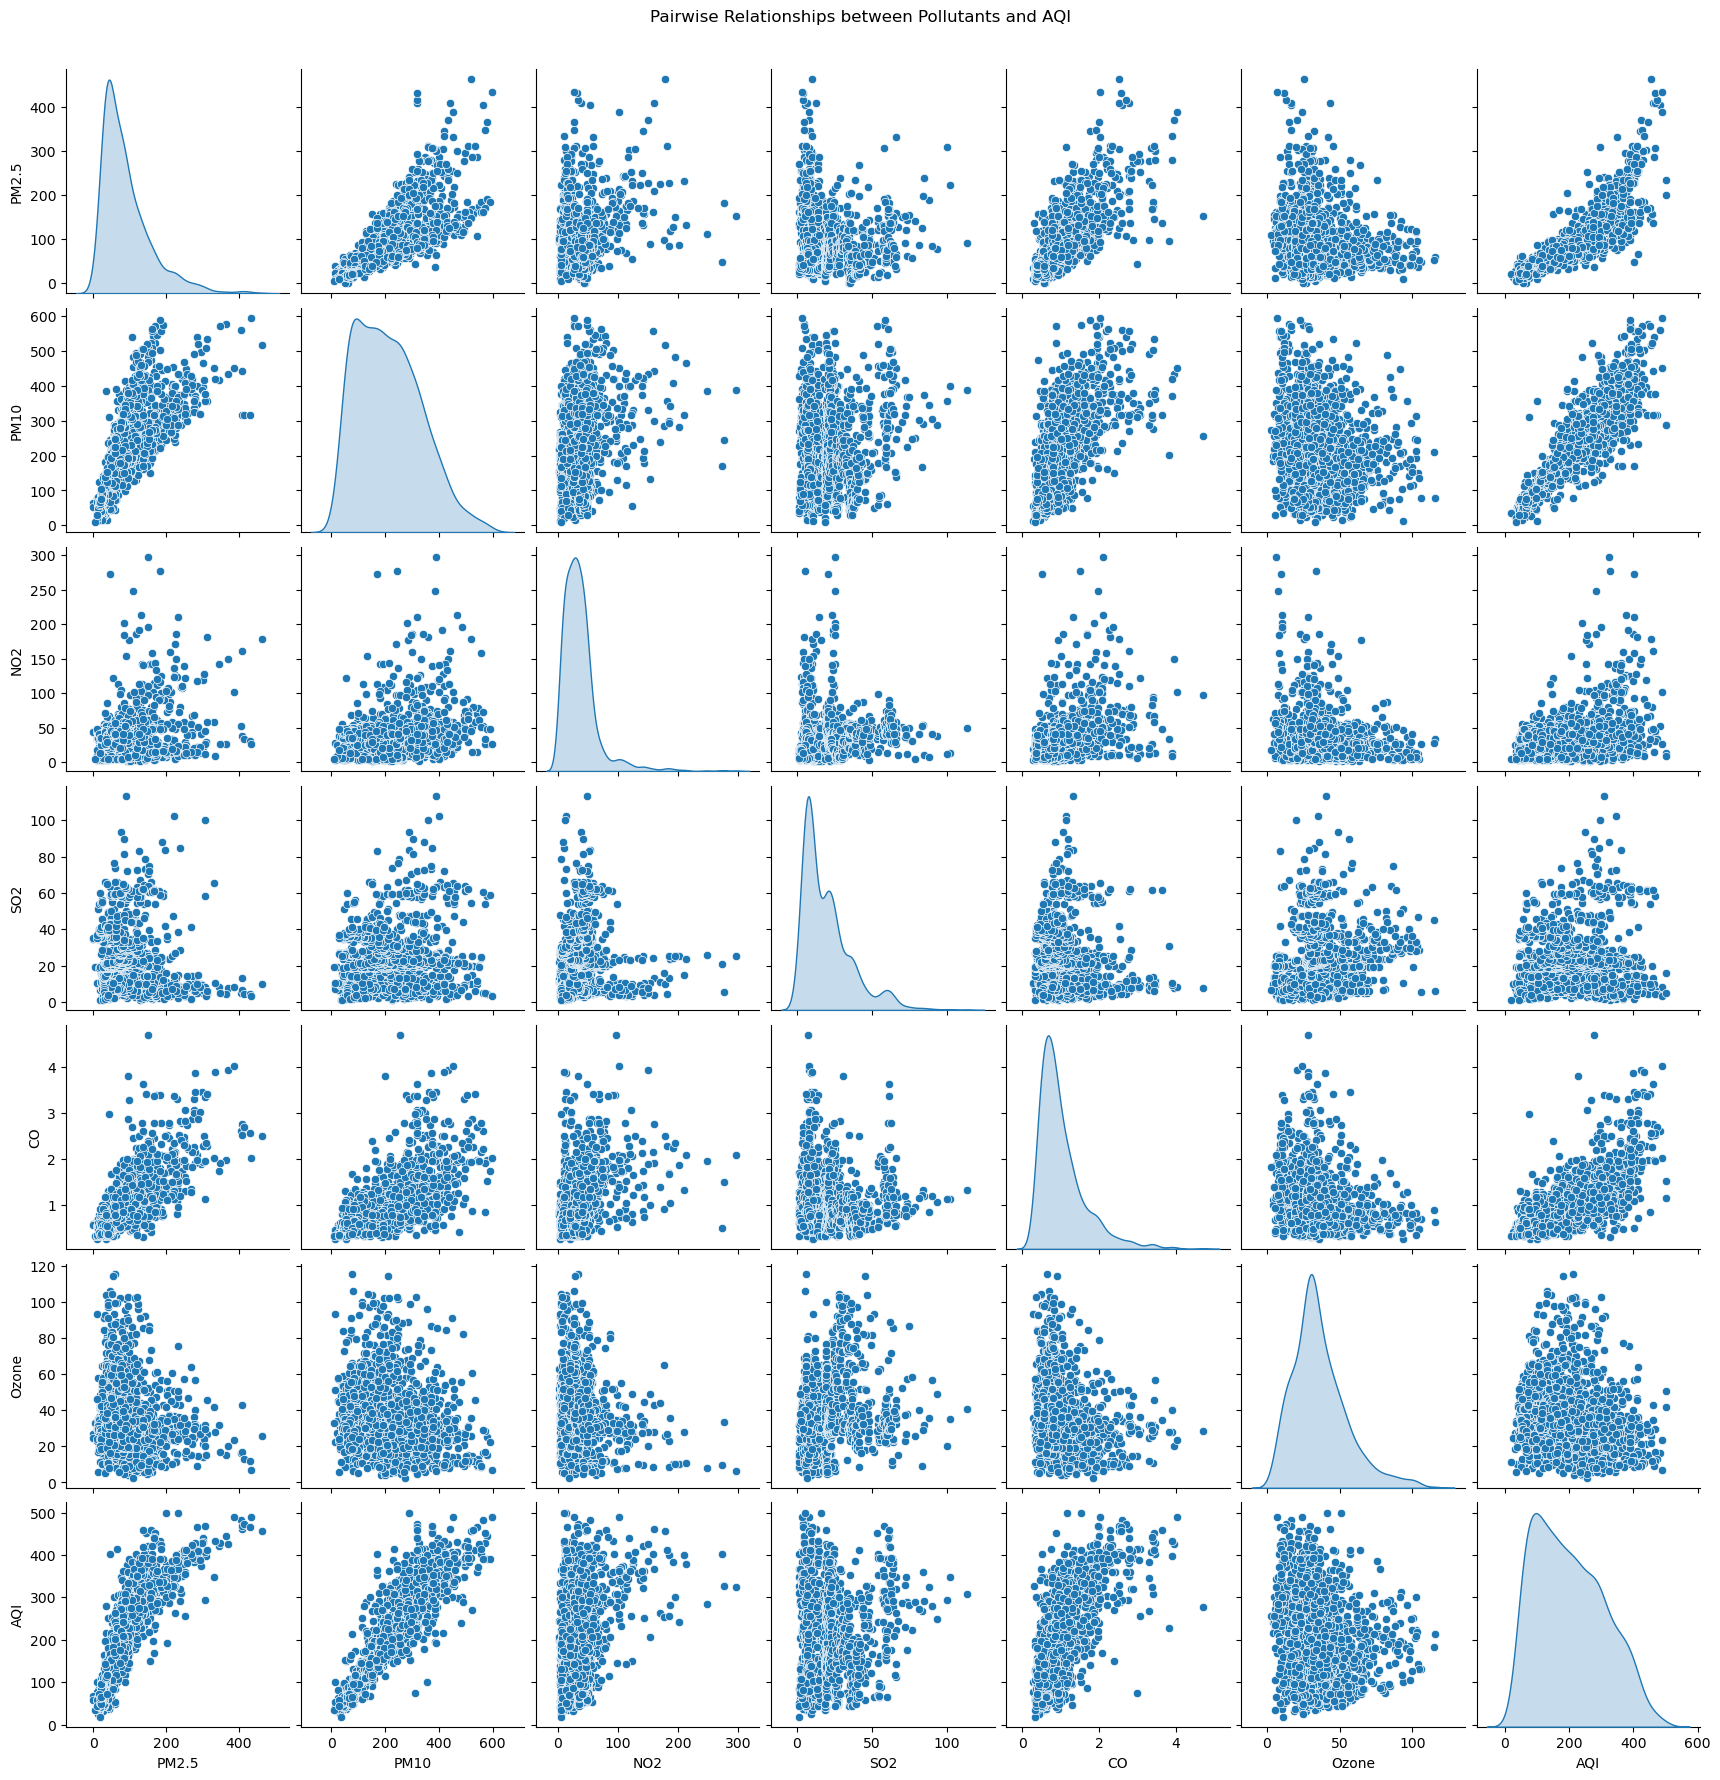

Average pollutant levels per year:
        PM2.5    PM10    NO2    SO2    CO  Ozone     AQI
Year                                                   
2021  120.32  212.16  49.86   7.91  1.23  34.50  215.81
2022   97.46  213.68  24.00  16.03  1.03  35.31  208.54
2023   70.42  208.26  34.93  19.48  0.96  36.06  189.06
2024   72.38  224.03  37.00  36.94  0.88  39.48  195.45


In [22]:
# 1. Year-wise comparison of AQI and pollutants : 
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Year", y="AQI", palette="coolwarm")
plt.title("Yearly AQI Distribution (2021–2024)")
plt.ylabel("AQI Level")
plt.show()

# 2. Pollutant pair relationship

sns.pairplot(df[["PM2.5", "PM10", "NO2", "SO2", "CO", "Ozone", "AQI"]], diag_kind="kde")
plt.suptitle("Pairwise Relationships between Pollutants and AQI", y=1.02)
plt.show()

# 3 . Simple statistical summary by year:

yearly_stats = df.groupby("Year")[["PM2.5","PM10","NO2","SO2","CO","Ozone","AQI"]].mean().round(2)
print("Average pollutant levels per year:\n", yearly_stats)


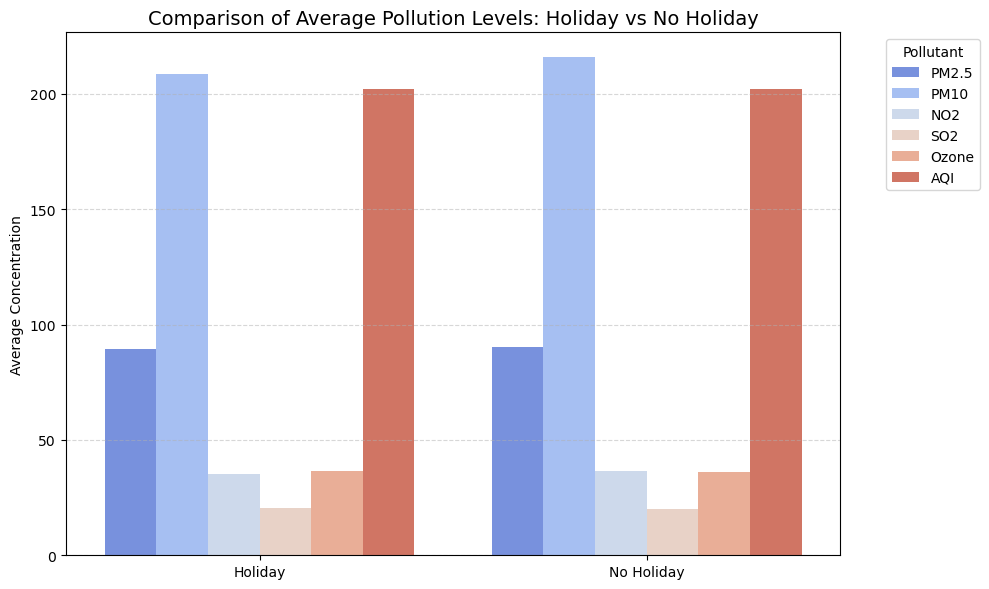

In [23]:
#Comparison of Pollutants by Holiday 

# Pollutant columns
pollutants = ["PM2.5", "PM10", "NO2", "SO2", "Ozone", "AQI"]

# Compute average values for holiday and non-holiday
holiday_avg = df.groupby("Holiday")[pollutants].mean().reset_index()

# Melt data to long format for plotting
melted = holiday_avg.melt(id_vars="Holiday", var_name="Pollutant", value_name="Concentration")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=melted,
    x="Holiday",
    y="Concentration",
    hue="Pollutant",
    palette="coolwarm"
)

# Customize
plt.title("Comparison of Average Pollution Levels: Holiday vs No Holiday", fontsize=14)
plt.xlabel("")
plt.ylabel("Average Concentration")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Pollutant", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

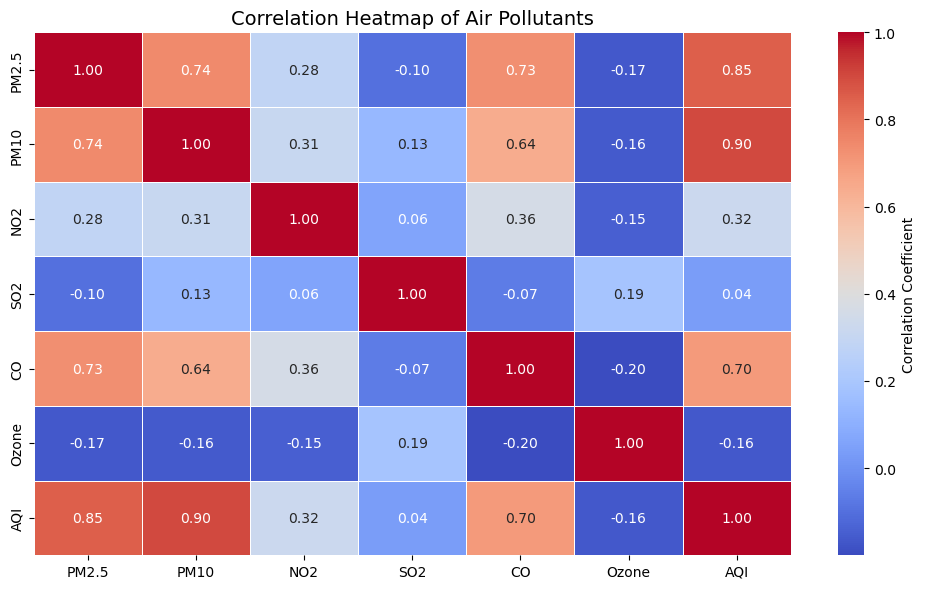


📊 **Automated Insights on Correlation Analysis**

1️⃣ Strongest correlation: **AQI** and **PM10**
   (r = 0.90)

2️⃣ Weakest correlation: **AQI** and **SO2**
   (r = 0.04)

3️⃣ Air Quality Index (AQI) analysis shows typical trends for pollutants.



In [24]:
insight_aqi = "Air Quality Index (AQI) analysis shows typical trends for pollutants."

# --- Select numeric columns, drop 'Year' if it exists ---
numeric_df = df.drop(columns=["Year"], errors="ignore").select_dtypes(include='number')

# --- Compute correlation matrix ---
corr = numeric_df.corr()

# --- Plot Heatmap ---
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"label": "Correlation Coefficient"}
)
plt.title("Correlation Heatmap of Air Pollutants", fontsize=14)
plt.tight_layout()
plt.show()

# --- Flatten the correlation matrix ---
corr_pairs = corr.unstack().reset_index()
corr_pairs = corr_pairs.rename(columns={"level_0": "Variable 1", "level_1": "Variable 2", 0: "Correlation"})

# --- Remove self-correlations and duplicates ---
corr_pairs = corr_pairs[corr_pairs["Variable 1"] < corr_pairs["Variable 2"]]

# --- Drop NaNs if any ---
corr_pairs = corr_pairs.dropna(subset=["Correlation"])

# --- Generate automated insights ---
if corr_pairs.empty:
    insight = "Not enough numeric variables to compute correlations between different variables."
else:
    strongest = corr_pairs.loc[corr_pairs["Correlation"].abs().idxmax()]
    weakest = corr_pairs.loc[corr_pairs["Correlation"].abs().idxmin()]

    insight = f"""
📊 **Automated Insights on Correlation Analysis**

1️⃣ Strongest correlation: **{strongest['Variable 1']}** and **{strongest['Variable 2']}**
   (r = {strongest['Correlation']:.2f})

2️⃣ Weakest correlation: **{weakest['Variable 1']}** and **{weakest['Variable 2']}**
   (r = {weakest['Correlation']:.2f})

3️⃣ {insight_aqi}
"""

print(insight)

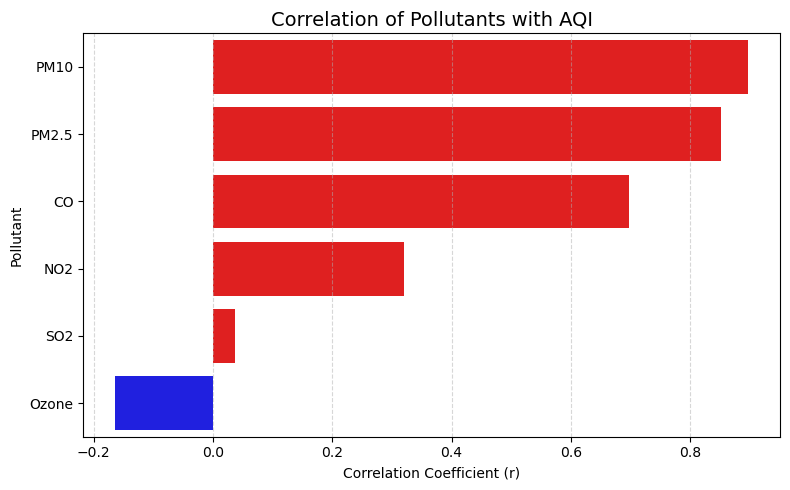


**Insight:**
The analysis shows that **PM10** (r = 0.90) has the strongest positive correlation with AQI, 
indicating it is the **primary driver of poor air quality** in the dataset.
PM2.5 (r = 0.85) also exhibits a notable relationship, 
suggesting its levels often rise alongside overall AQI.

Meanwhile, Ozone show weak or negative correlations, 
implying these pollutants may behave differently or have **less direct influence** on air quality.



In [25]:
# Define pollutant columns
pollutants = ["PM2.5", "PM10", "NO2", "SO2", "CO", "Ozone", "AQI"]

# Compute correlation with AQI
corr = df[pollutants].corr()
aqi_corr = corr["AQI"].drop("AQI").sort_values(ascending=False)

# --- Visualization ---
plt.figure(figsize=(8, 5))
sns.barplot(
    x=aqi_corr.values,
    y=aqi_corr.index,
    palette=["red" if x > 0 else "blue" for x in aqi_corr.values]
)
plt.title("Correlation of Pollutants with AQI", fontsize=14)
plt.xlabel("Correlation Coefficient (r)")
plt.ylabel("Pollutant")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- Automated Insight Generator ---
top_positive = aqi_corr[aqi_corr > 0].head(2)
top_negative = aqi_corr[aqi_corr < 0].head(2)

insight = f"""
**Insight:**
The analysis shows that **{top_positive.index[0]}** (r = {top_positive.iloc[0]:.2f}) has the strongest positive correlation with AQI, 
indicating it is the **primary driver of poor air quality** in the dataset.
{top_positive.index[1]} (r = {top_positive.iloc[1]:.2f}) also exhibits a notable relationship, 
suggesting its levels often rise alongside overall AQI.

Meanwhile, {', '.join(top_negative.index)} show weak or negative correlations, 
implying these pollutants may behave differently or have **less direct influence** on air quality.
"""

print(insight)

In [26]:
# AQI Level Analysis & Visualization

#This section visualizes the Air Quality Index (AQI) trends across months, quarters, and holidays to identify seasonal and temporal patterns in Delhi's air quality from 2021–2024.


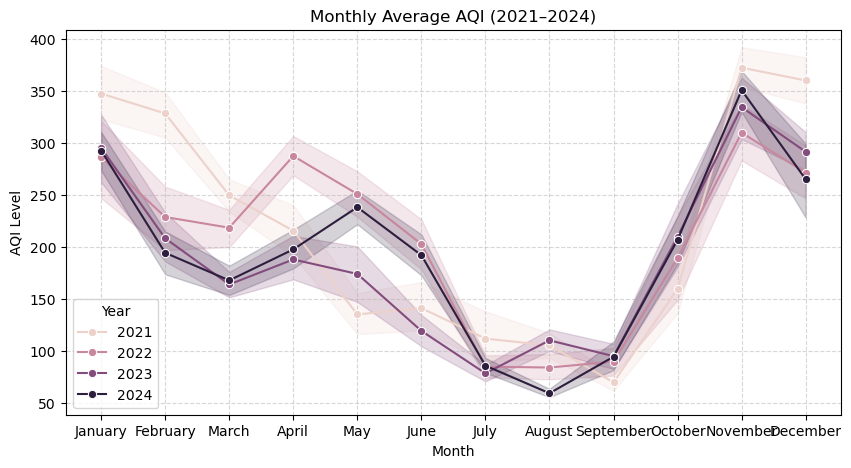

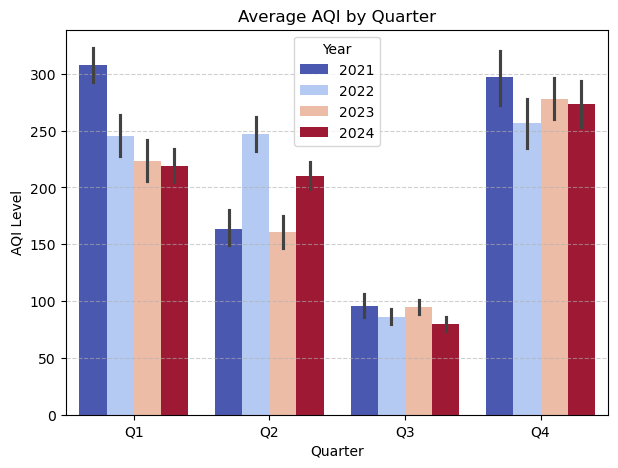

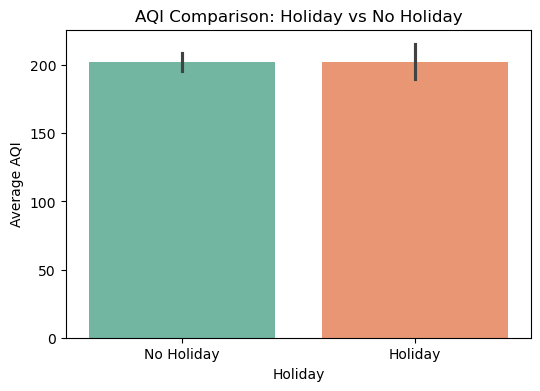

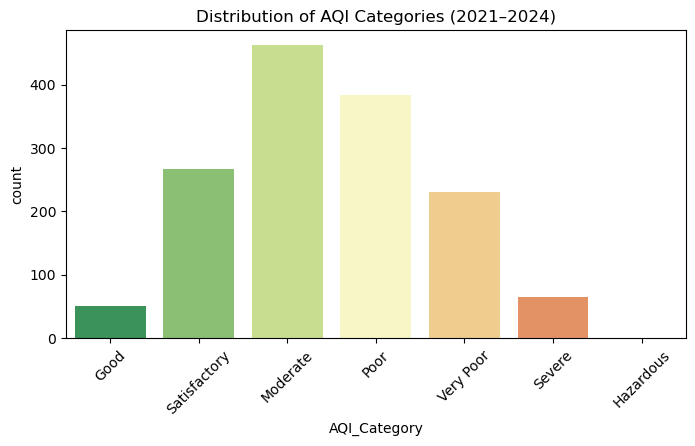

In [27]:
# --- AQI Analysis ---

# AQI Trend by Month and Year
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="Month", y="AQI", hue="Year", marker="o")
plt.title("Monthly Average AQI (2021–2024)")
plt.xlabel("Month")
plt.ylabel("AQI Level")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# AQI by Quarter
plt.figure(figsize=(7,5))
sns.barplot(data=df, x="Quarter", y="AQI", hue="Year", palette="coolwarm")
plt.title("Average AQI by Quarter")
plt.ylabel("AQI Level")
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()

# AQI: Holiday vs Non-Holiday
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="Holiday", y="AQI", palette="Set2")
plt.title("AQI Comparison: Holiday vs No Holiday")
plt.ylabel("Average AQI")
plt.show()

# AQI Category Distribution
bins = [0, 50, 100, 200, 300, 400, 500, float('inf')]
labels = ["Good", "Satisfactory", "Moderate", "Poor", "Very Poor", "Severe", "Hazardous"]
df["AQI_Category"] = pd.cut(df["AQI"], bins=bins, labels=labels)

plt.figure(figsize=(8,4))
sns.countplot(data=df, x="AQI_Category", palette="RdYlGn_r")
plt.title("Distribution of AQI Categories (2021–2024)")
plt.xticks(rotation=45)
plt.show()


# 🏁 Final Conclusion & Insights

This project analyzed Delhi’s Air Quality Index (AQI) from 2021 to 2024 using pollutant data such as PM2.5, PM10, NO₂, SO₂, CO, and Ozone.  
   he data was cleaned, processed, and visualized to uncover seasonal and yearly air quality trends.

 Key Insights:
- AQI levels remained mostly in the *Poor to Very Poor* category across 2021–2024.  
- **PM2.5** and **PM10** were found to be the major contributors to high AQI values.  
- Air pollution peaked during **Q4 (October–December)** and improved during **Q2 (April–June)** due to seasonal winds and rainfall.  
- Air quality was slightly better on **Holidays**, suggesting reduced traffic and industrial activity.  

Overall, Delhi’s air quality continues to fluctuate seasonally, with winter months showing severe pollution levels that require stricter emission control measures.

